## Large Scale Final Project
Do Amazon voting behaviors reveal social conformity?
Chun Hu

### Category 4: Home

In [0]:
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Home/*.parquet')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1591214933999_0005,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
Total Rows: 6228567
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
data.groupby('marketplace').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------+
|marketplace|  count|
+-----------+-------+
|         DE|   1454|
|         US|6223566|
|         UK|   2694|
|         FR|    735|
|         JP|    118|
+-----------+-------+

There are few data in JP and FR marketplaces -- this may introduce large variance and biased results.

In [0]:
data = data.withColumn('helpful_ratio', (data.helpful_votes / data.total_votes).cast("float"))
data = data.filter('helpful_ratio IS NOT NULL')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_rating = data.groupBy('product_id').avg('star_rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_home = data.join(avg_rating, on=['product_id'], how='left_outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_home[['product_id', 'star_rating', 'helpful_ratio', 'avg(star_rating)']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------+-------------+----------------+
|product_id|star_rating|helpful_ratio|avg(star_rating)|
+----------+-----------+-------------+----------------+
|0307463826|          5|          1.0|             4.5|
|0307463826|          1|          0.5|             4.5|
|0307463826|          4|   0.33333334|             4.5|
|0307463826|          5|          1.0|             4.5|
|0307463826|          5|          1.0|             4.5|
|0307463826|          4|          0.0|             4.5|
|0307463826|          4|          0.0|             4.5|
|0307463826|          5|          1.0|             4.5|
|0307463826|          5|          1.0|             4.5|
|0307463826|          5|          0.0|             4.5|
|0307463826|          4|         0.95|             4.5|
|0307463826|          5|    0.9589041|             4.5|
|0307463826|          5|          1.0|             4.5|
|0307463826|          5|          1.0|             4.5|
|0307463826|          5|        0.925|          

In [0]:
data_home = data_home.withColumn('avg_rating', data_home["avg(star_rating)"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Descriptive Statistics for products in HOME category:

In [0]:
data_home[['avg_rating']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        avg_rating|
+-------+------------------+
|  count|           2365030|
|   mean|3.8618820902905675|
| stddev|0.8607045971402699|
|    min|               1.0|
|    25%| 3.422222222222222|
|    50%|               4.0|
|    75%|               4.5|
|    max|               5.0|
+-------+------------------+

In [0]:
data_home[['helpful_votes']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|     helpful_votes|
+-------+------------------+
|  count|           2365030|
|   mean| 4.541887840746206|
| stddev|29.029052706471678|
|    min|                 0|
|    25%|                 1|
|    50%|                 1|
|    75%|                 3|
|    max|              7917|
+-------+------------------+

In [0]:
from  pyspark.sql.functions import abs

data_home = data_home.withColumn('rating_diff', abs(data_home.avg_rating - data_home.star_rating).cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_home[['product_id', 'helpful_ratio', 'rating_diff']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+-----------+
|product_id|helpful_ratio|rating_diff|
+----------+-------------+-----------+
|0307463826|          0.0|        0.5|
|0307463826|        0.925|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|        0.875|        0.5|
|0307463826|    0.9589041|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          0.0|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          0.5|        3.5|
|0307463826|         0.95|        0.5|
|0307463826|    0.9347826|        0.5|
|0307463826|   0.33333334|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          1.0|        0.5|
|0307463826|          0.0|        0.5|
|0486417700|          1.0|        1.0|
|0486417700|          1.0|        1.0|
+----------+-------------+-----------+
only showing top 20 rows

In [0]:
sc.install_pypi_package("seaborn")
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/5f/1b6e0efab4bfb738478919d40b0e3e1a06e3d9996da45eb62a77e9a090d9/pandas-1.0.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

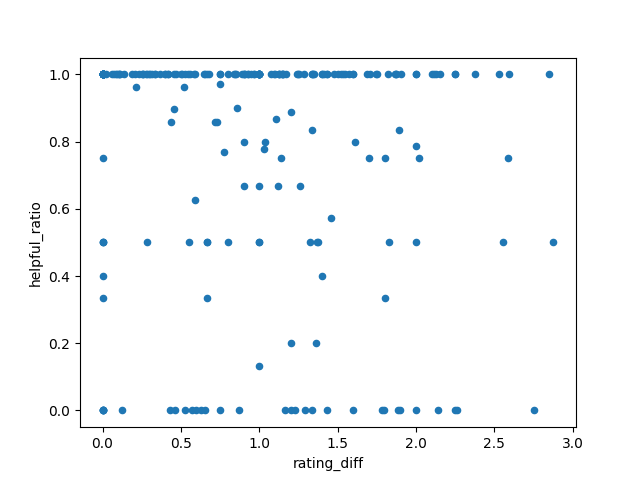

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = data_home.sample(fraction=0.0001).toPandas()
sampled_df.plot.scatter('rating_diff', 'helpful_ratio')
%matplot plt

In [0]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        inputCol="helpful_ratio", outputCol="ratio_buckets")
home_buck = bucketizer.setHandleInvalid("keep").transform(data_home)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

t = {0.0:"0.1", 1.0:"0.2", 2.0:"0.3", 3.0:"0.4", 4.0:"0.5", 5.0:"0.6", 6.0:"0.7", 7.0:"0.8", 8.0:"0.9", 9.0:"1.0"}
udf_foo = udf(lambda x: t[x], StringType())
home_buck = home_buck.withColumn("helpfulness_ratio", udf_foo("ratio_buckets"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_df = (home_buck.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_df.filter(avg_df.helpfulness_ratio != '0.1')
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+
|helpfulness_ratio|  avg(rating_diff)|
+-----------------+------------------+
|              1.0|0.7758211307721945|
|              0.9|1.1499160403901532|
|              0.8|1.2173013527852896|
|              0.7|1.1916362898564017|
|              0.6|1.1006686166937705|
|              0.5|1.7081438853774271|
|              0.4|1.4217359847915843|
|              0.3|1.6505221340371492|
|              0.2|1.8605264366845535|
+-----------------+------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

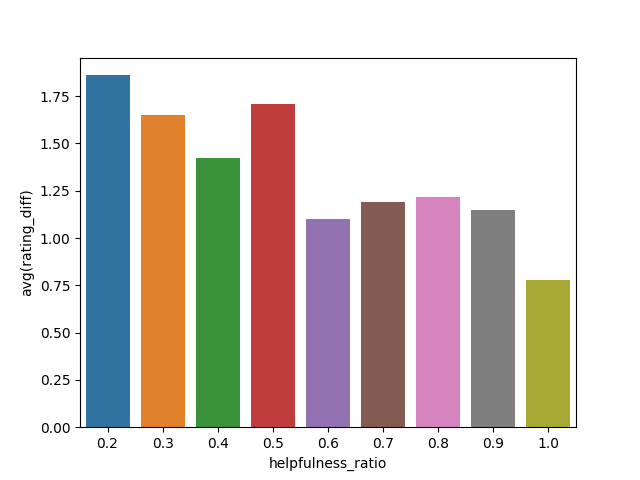

In [0]:
plt.close()

sns.barplot(x='helpfulness_ratio', y='avg(rating_diff)', data=avg_df.toPandas())
%matplot plt

The barplot shows that as helpfulness ratio increases, the difference between review rating and average product rating decreases. This confirms our hypothesis that there is social conformity in voting behaviors.

### By Marketplace
Do different marketplaces (or countries) have different trends?

In [0]:
us_home = home_buck.filter(home_buck.marketplace == 'US')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_us = (us_home.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_us.filter(avg_us.helpfulness_ratio != '0.1')
avg_df = avg_df.withColumn('diff', avg_df["avg(rating_diff)"])
avg_df = avg_df.selectExpr("helpfulness_ratio as helpfulness_ratio", "diff as US")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+
|helpfulness_ratio|                US|
+-----------------+------------------+
|              1.0|0.7757579824010519|
|              0.9|1.1500133430035278|
|              0.8|1.2176969738811096|
|              0.7|1.1922080818205363|
|              0.6|1.1009896214898898|
|              0.5|1.7086343293993387|
|              0.4|1.4223455120771884|
|              0.3|1.6512771218400262|
|              0.2|1.8601396124119784|
+-----------------+------------------+

In [0]:
uk_home = home_buck.filter(home_buck.marketplace == 'UK')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_uk = (uk_home.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_uk = avg_uk.filter(avg_uk.helpfulness_ratio != '0.1')
avg_uk = avg_uk.withColumn('diff', avg_uk["avg(rating_diff)"])
avg_df = avg_df.join(avg_uk, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "diff as UK")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+------------------+
|helpfulness_ratio|                US|                UK|
+-----------------+------------------+------------------+
|              1.0|0.7757579824010519|0.7642049321852554|
|              0.9|1.1500133430035278|0.9744938310272623|
|              0.8|1.2176969738811096|0.7637676735563824|
|              0.7|1.1922080818205363|0.8581774062231967|
|              0.6|1.1009896214898898|0.9020239755949553|
|              0.5|1.7086343293993387|1.0852015882730484|
|              0.4|1.4223455120771884|1.1035868413746357|
|              0.3|1.6512771218400262|1.4322967857122422|
|              0.2|1.8601396124119784|1.9789567788441975|
+-----------------+------------------+------------------+

In [0]:
de_home = home_buck.filter(home_buck.marketplace == 'DE')

avg_de = (de_home.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_de = avg_de.filter(avg_de.helpfulness_ratio != '0.1')
avg_de = avg_de.withColumn('diff', avg_de["avg(rating_diff)"])
avg_df = avg_df.join(avg_de, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "diff as DE")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+------------------+------------------+
|helpfulness_ratio|                US|                UK|                DE|
+-----------------+------------------+------------------+------------------+
|              1.0|0.7757579824010519|0.7642049321852554|1.0079402901689734|
|              0.9|1.1500133430035278|0.9744938310272623|1.2432314473830286|
|              0.8|1.2176969738811096|0.7637676735563824|1.1000097915530205|
|              0.7|1.1922080818205363|0.8581774062231967|0.9289795406549782|
|              0.6|1.1009896214898898|0.9020239755949553|0.8640118750313727|
|              0.5|1.7086343293993387|1.0852015882730484|1.7164788411723242|
|              0.4|1.4223455120771884|1.1035868413746357| 1.093905902802944|
|              0.3|1.6512771218400262|1.4322967857122422|1.2965281699833118|
|              0.2|1.8601396124119784|1.9789567788441975|2.2069690823554993|
+-----------------+------------------+------------------+------------------+

In [0]:
fr_home = home_buck.filter(home_buck.marketplace == 'FR')

avg_fr = (fr_home.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_fr = avg_fr.filter(avg_fr.helpfulness_ratio != '0.1')
avg_fr = avg_fr.withColumn('diff', avg_fr["avg(rating_diff)"])
avg_df = avg_df.join(avg_fr, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "diff as FR")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
jp_home = home_buck.filter(home_buck.marketplace == 'JP')

avg_jp = (jp_home.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_jp = avg_jp.filter(avg_jp.helpfulness_ratio != '0.1')
avg_jp = avg_jp.withColumn('diff', avg_jp["avg(rating_diff)"])
avg_df = avg_df.join(avg_jp, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "FR", "diff as JP")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

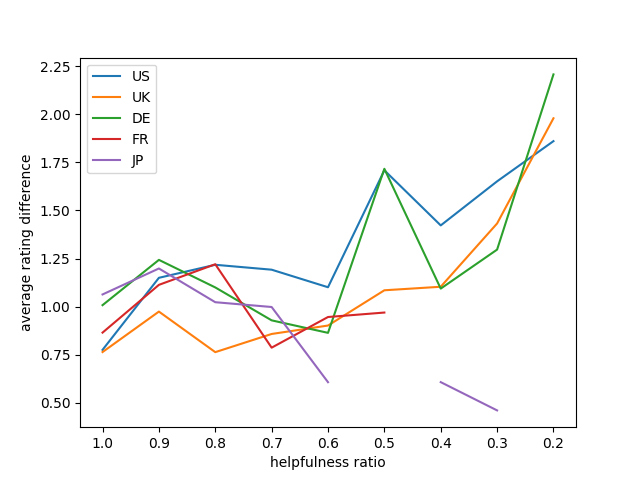

In [0]:
# plot for all countries
plt.close()

US, = plt.plot('helpfulness_ratio', 'US', data=avg_df.toPandas(), label="US")
UK, = plt.plot('helpfulness_ratio', 'UK', data=avg_df.toPandas(), label="UK")
DE, = plt.plot('helpfulness_ratio', 'DE', data=avg_df.toPandas(), label="DE")
FR, = plt.plot('helpfulness_ratio', 'FR', data=avg_df.toPandas(), label="FR")
JP, = plt.plot('helpfulness_ratio', 'JP', data=avg_df.toPandas(), label="JP")
plt.legend(handles=[US, UK, DE, FR, JP])
plt.xlabel('helpfulness ratio')
plt.ylabel('average rating difference')
%matplot plt

As we expected, since we have few data for JP and FR marketplaces, there are large fluctuations in our results -- some places do not even have data to support. The other three marketplaces still show a trend for social conformity.

### Sentiment Analysis
What are some characteristics of reviews that have high or low helpfulness ratio?

In [1]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.5.1

# Quick SparkSession start
import sparknlp
spark = sparknlp.start()

print("Spark NLP version")
sparknlp.version()
print("Apache Spark version")
spark.version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
Processing /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471/pyspark-2.4.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e3/53/c737818eb9a7dc32a7cd4f1396e787bd94200c3997c72c1dbe028587bd76/py4j-0.10.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/df/b4/db653f8080a446de8ce981b262d85c85c61de7e920930726da0d1c6b4c65/spark_nlp-2.5.1-py2.py3-none-any.whl
Spark NLP version
Apache Spark version


'2.4.4'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import glob
import pandas as pd

file_path = glob.glob("/content/drive/My Drive/amazon-reviews-dataset/*")
file = file_path[1]

with open(file) as tsvfile:
    col_names = ["marketplace", "customer_id", "review_id", "product_id", "product_parent", "product_title",
               "category", "star_rating", "helpful_votes", "total_votes", "vine", "verified_purchase", 
               "review_headline", "review_body", "review_date"]
    data = pd.read_csv(file, sep='\t', names=col_names, skiprows=2000000, low_memory=False)

In [4]:
data['helpful_ratio'] = data['helpful_votes'] / data['total_votes']
data = data[data['helpful_ratio'].notnull()]
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_ratio
3,US,16392422,R21NDRWDPE4GZH,B0010DLN8O,131861874,X-Mite Anti-Allergen Moist Powder Carpet Cleaner,Home,3.0,3.0,3.0,N,Y,"This seemed to clean my carpet somewhat, but I...","This seemed to clean my carpet somewhat, but I...",2015-01-14,1.000000
7,US,19923151,R3HC6711ZHESVE,B00F3HFFFA,219988054,Queen Doggone Good Time Sheet Set,Home,2.0,2.0,12.0,N,N,I've been wanting to buy these sheets for some...,I've been wanting to buy these sheets for some...,2015-01-14,0.166667
10,US,19739998,R2UZVP5GQ74OHH,B00PKU3LEW,915712943,La Crosse Technology,Home,4.0,0.0,1.0,N,Y,Display is nice. Seems to be very accurate,Been in use now since Christmas.<br />Display ...,2015-01-14,0.000000
11,US,18835472,R1ESNYLGP86F7,B00LV4W85O,284914718,Hotel Luxury Bed Sheets Set 1800 Series Platin...,Home,4.0,1.0,1.0,N,Y,So soft!,Super speedy delivery! The material was much s...,2015-01-14,1.000000
17,US,699873,R27ZCLTPY6KKYC,B00QJGI830,391314914,Olive Kids Under Construction Rolling Luggage,Home,5.0,0.0,2.0,N,Y,Five Stars,My granddaughter loves the color yellow. This ...,2015-01-14,0.000000


In [5]:
most_helpful = data[data['helpful_ratio'] == 1.0]
most_helpful.shape

(1102825, 16)

In [6]:
least_helpful = data[data['helpful_ratio'] <= 0.2]
least_helpful.shape

(228106, 16)

In [0]:
from sklearn.utils import shuffle
most_helpful = shuffle(most_helpful)[:10000]
least_helpful = shuffle(least_helpful)[:10000]

In [8]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('analyze_sentiment', lang='en')
most_helpful['sentiment'] = most_helpful['review_body'].apply(pipeline.annotate)

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [0]:
most_helpful['bin'] = most_helpful.sentiment.apply(lambda x: x['sentiment'][0])
most_helpful['sentiment_value'] = most_helpful.bin.astype("category").cat.codes - 1

In [10]:
most_helpful['sentiment_value'].mean()

0.5423

In [0]:
least_helpful['sentiment'] = least_helpful['review_body'].apply(pipeline.annotate)

In [0]:
least_helpful['bin'] = least_helpful.sentiment.apply(lambda x: x['sentiment'][0])
least_helpful['sentiment_value'] = least_helpful.bin.astype("category").cat.codes - 1

In [13]:
least_helpful['sentiment_value'].mean()

0.5169

Helpful reviews and unhelpful reviews have similar sentiment values.

### TF-IDF
What are the top terms in helpful and unhelpful reviews?

In [0]:
most_helpful = data[data['helpful_ratio'] == 1.0]
least_helpful = data[data['helpful_ratio'] < 0.2]
most_helpful = shuffle(most_helpful)[:10000][['review_body']]
least_helpful = shuffle(least_helpful)[:10000][['review_body']]

In [0]:
from pyspark.sql import SparkSession
# start spark session
spark = SparkSession.builder.master('local[*]').getOrCreate()

spark_helpful = spark.createDataFrame(most_helpful)
spark_unhelpful = spark.createDataFrame(least_helpful)

In [0]:
from pyspark.ml.feature import *
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="review_body", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
countVect = CountVectorizer(inputCol="filtered", outputCol="cv",  minDF=5.0)
idf = IDF(inputCol="cv", outputCol="idf")
pipeline = Pipeline(stages=[tokenizer, remover, countVect, idf])

Helpful Reviews

In [0]:
helpful = pipeline.fit(spark_helpful).transform(spark_helpful)

In [0]:
helpful_df = helpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in helpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in helpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [23]:
for i in indices[:10]:
    print(words[i])

since
take
review,
looks
long
beyond
review
currently
bit
for,


Unhelpful Reviews

In [0]:
unhelpful = pipeline.fit(spark_unhelpful).transform(spark_unhelpful)

In [0]:
unhelpful_df = unhelpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in unhelpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in unhelpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [28]:
for i in indices[:15]:
    print(words[i])

clean
offer
smaller...
-
us.
crappy

falls.
buy
refunded
long
nice
well
breeze
burn
